In [8]:
import pandas as pd
recent_grads = pd.read_csv('recent_grads2.csv', header=0)
#recent_grads = pd.read_table('recent_grads.csv')

In [9]:
print(recent_grads.head())
print(recent_grads.iloc[4,0])

   unemployed  unemployment_rate  median  p25th   p75th  college_jobs
0          37           0.018381  110000  95000  125000          1534
1          85           0.117241   75000  55000   90000           350
2          16           0.024096   73000  50000  105000           456
3          40           0.050125   70000  43000   80000           529
4        1672           0.061098   65000  50000   75000         18314
1672


In [10]:
# Names of the columns we're searching for missing values 
columns = ['median', 'p25th', 'p75th']

# Take a look at the dtypes
print(recent_grads[columns].dtypes)

# Find how missing values are represented
print(recent_grads["median"].unique())

median    object
p25th     object
p75th     object
dtype: object
['110000' '75000' '73000' '70000' '65000' 'UN' '62000' '60000' '58000'
 '57100' '57000' '56000' '54000' '53000' '52000' '51000' '50000']


In [14]:
import numpy as np
import pandas as pd

# Replace missing values with NaN
for column in columns:
    recent_grads.loc[recent_grads[column] == 'UN', column] = np.nan

In [15]:
print(recent_grads)

    unemployed  unemployment_rate  median  p25th   p75th  college_jobs
0           37           0.018381  110000  95000  125000          1534
1           85           0.117241   75000  55000   90000           350
2           16           0.024096   73000  50000  105000           456
3           40           0.050125   70000  43000   80000           529
4         1672           0.061098   65000  50000   75000         18314
5          400           0.177226   65000  50000  102000          1142
6          308           0.095652     NaN    NaN     NaN          1768
7           33           0.021167   62000  31500  109000           972
8         4650           0.057342   60000  48000   70000         52844
9         3895           0.059174   60000  45000   72000         45829
10        2275           0.065409   60000  45000   75000         23694
11         794           0.065162   60000  42000   70000          8184
12        1019           0.092084   60000  36000   70000          6439
13    

Converting a DataFrame to Numpy Array

Since numpy is such a powerful Python module, this exercise asks you to convert a pandas DataFrame to a numpy array to then utilize a statistics metric available through numpy in the next exercise.
Instructions
70 XP

    Select the columns unemployed and low_wage_jobs from recent_grads, then convert them to a numpy array. Save this as recent_grads_np.
    Print the type of recent_grads_np to see that it is a numpy array.


In [ ]:
# Convert to numpy array
recent_grads_np = np.array(recent_grads.loc[:,['unemployed','low_wage_jobs']])


# Print the type of recent_grads_np
print(type(recent_grads_np))

# Calculate correlation matrix
print(np.corrcoef(recent_grads_np[:,0], recent_grads_np[:,1]))

# Filtering rows

Finally you can filter out for departments which fail the benchmark of a difference of more than 0.30. Since all the values are now positive, you can do this with a simple boolean operator.

You want to find the rows containing departments that are skewed heavily towards men. Using work you've already done, you'll create a new DataFrame that contains this information.

The DataFrame recent_grads still has the columns sharemen and gender_diff that you created in previous exercises.
## Instructions
100 XP

    Create diff_30, a boolean Series that is True when the corresponding value of gender_diff is greater than 0.30 and False otherwise.
    Make another boolean Series called more_men that's true when the corresponding row in recent_grads has more men than women.
    Combine your two Series to make one that you can use to select rows that have both more men than women and a value of gender_diff greater than 0.30. Save the result as more_men_and_diff_30.
    Use this new boolean Series to create the DataFrame fewer_women that contains only the rows you're interested in.


In [ ]:
# Rows where gender rate difference is greater than .30 
diff_30 = recent_grads['gender_diff'] > .30

# Rows with more men
more_men = recent_grads['sharemen'] > recent_grads['sharewomen']

# Combine more_men and diff_30
more_men_and_diff_30 = np.logical_and(diff_30,more_men)

# Find rows with more men and and gender rate difference greater than .30
fewer_women = recent_grads[more_men_and_diff_30]

# Grouping with Counts

There are various department categories but no sense of how many departments there are in each category. You'll use pandas to gain insight into this information.

In particular, you'll use the .groupby() method of pandas. This was not introduced to you in the course, but you'll see it very frequently in your data science journey and it's an important method to understand. This set of exercises will extend your pandas knowledge by teaching you how to use the .groupby() method.

Calls to .groupby() have the following three components: the column you want to group, the column you want to aggregate, and the statistic you want to aggregate by. For example, in our dataset, if we wanted to see the percentage of women ('sharewomen') per 'major_category', we could leverage a .groupby like so: recent_grads.groupby('major_category')['sharewomen'].mean(). Here, we are grouping by 'major_category', and aggregating 'sharewomen' by the mean. Give it a try in the IPython Shell if you're curious to see the result!
## Instructions
100 XP

    Using the .groupby() method, group the recent_grads DataFrame by 'major_category' and then count the number of departments per category using .count().


In [ ]:
# Group by major category and count
print(recent_grads.groupby(['major_category']).major_category.count())

# Grouping with Counts, Part 2

You want to get a sense of the number of majors with a lot less women, so you'll perform a similar operation as the one from the last exercise.

Use the fewer_women DataFrame from a previous exercise.
## Instructions
100 XP

    Create a DataFrame that groups the departments by major category and shows the number of departments that are skewed in women.


In [ ]:
# Group departments that have less women by category and count
print(fewer_women.groupby(['major_category']).major_category.count())

# Grouping One Column with Means

Similar to the exercise you just completed, you can group rows to output the means of different groups within a column.

The column gender_diff is still available in the recent_grads DataFrame.
## Instructions
100 XP

    Write code that outputs the average gender percentage difference by major category.


In [ ]:
# Report average gender difference by major category
print(recent_grads.groupby(['major_category']).gender_diff.mean())

# Grouping Two Columns with Means

You can expand the previous operation to include two columns and output the means for each. To accomplish this, modify the code you just wrote.
## Instructions
100 XP

    Write a query that outputs the mean number of 'low_wage_jobs' and average 'unemployment_rate' grouped by 'major_category'

In [ ]:
# Find average number of low wage jobs and unemployment rate of each major category
dept_stats = recent_grads.groupby(['major_category'])['low_wage_jobs', 'unemployment_rate'].mean()
print(dept_stats)

# Plotting Two Bar Graphs

The previous visualization gives you a good picture of how many students are working at jobs that don't require a college degree, but it doesn't give you a sense of how each category is doing relative to one another. So you decide to add the college_jobs column as an extra bar of information so that you can evaluate the difference between the two.
## Instructions
70 XP

    Use pandas to create a DataFrame that reports the number of graduates working at jobs that do require college degrees ('college_jobs'), and do not require college degrees ('non_college_jobs'). Assign this to a variable named df1.
    Create a plot that reports this data with matplotlib.
    Display the plot you've created!


In [ ]:
# DataFrame of college and non-college job sums
df1 = recent_grads.groupby('major_category')['college_jobs','non_college_jobs'].sum()

# Plot bar chart
df1.plot(kind='bar')

# Show graph
plt.show()

Plotting Quantiles of Salary, Part 1

Now you're interested in plotting a few different quantiles of the average salary across major categories so that you can compare the different distributions of salary. In this exercise you'll prepare your data for matplotlib.
Instructions
70 XP

    The columns median, p25th, and p75th are currently encoded as strings. Convert these columns to numerical values. Then, divide the value of each column by 1000 to make the scale of the final plot easier to read.
    Find the of each of the three columns for each major category. Save this as sal_quantiles


In [ ]:
# Convert to numeric and divide by 1000
recent_grads['median'] = pd.to_numeric(recent_grads['median'])/1000
recent_grads['p25th'] = pd.to_numeric(recent_grads['p25th'])/1000
recent_grads['p75th'] = pd.to_numeric(recent_grads['p75th'])/1000

# Select averages by major category
columns = ['median', 'p25th', 'p75th']
sal_quantiles = recent_grads.groupby('major_category')[columns].mean()

In [ ]:
# Plot the data
sal_quantiles.plot()

# Set xticks
plt.xticks(
    np.arange(len(sal_quantiles.index)),
    sal_quantiles.index, 
    rotation='vertical')

# Show the plot
plt.show()

# Plot with subplots
sal_quantiles.plot(subplots=True)
plt.show()

In [1]:
x = [2, 5, 4, 3, 7, 1]
x[:3]

[2, 5, 4]

In [2]:
import numpy as np
costs = np.column_stack(([1, 1, 1, 2, 2, 2, 1, 2], 
                         [7, 7, 5, 4, 5, 5, 5, 7]))

In [3]:
mean_costs = np.mean(costs[1])
print(mean_costs)

4.0


In [4]:
x = ["B", "D", "Z", "A", "E", "Q"]
print(x[-2:])

['E', 'Q']


In [6]:
x=1
print(int(x))

1


In [16]:
x = [6, 15, 19, 8, 18, 1]
#print(order(x, reverse=True))
#print(sort(x, reverse=True))
print(sorted(x, reverse=True))
#print(np.sorted(x, reverse=True))
#print(np.order(x, reverse=True))
#print(order(x, reverse=True))

[19, 18, 15, 8, 6, 1]


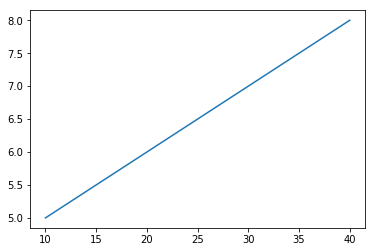

In [19]:
import matplotlib.pyplot as plt
plt.plot([10, 20, 30, 40], [5, 6, 7, 8])
plt.show()

In [21]:
import matplotlib.pyplot as plt
plt.lineplot([10, 20, 30, 40], [5, 6, 7, 8])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'lineplot'

In [22]:
import numpy as np
np_2d = np.array([[7, 8, 9], 
                  [14, 15, 16]])
print(np_2d[0:, :1])

[[ 7]
 [14]]


In [23]:
x = 6
if not x:
    print("First attempt")
elif x % 2 == 0:
    print("Second attempt")
else:
    print("Final attempt")

Second attempt


In [24]:
x = [1, 3, 5, 7, 9, 11]
print(x[4:])

[9, 11]


In [25]:
x = 5
y = -2
z = 19
print([z,y,x])

[19, -2, 5]


In [26]:
x = [1, 2, 3, 4]
y = x
y[1:3] = [5, 6]
print(x)

[1, 5, 6, 4]


In [27]:
x = [7, 1, 3, 10, 5, 9]
print(max(x))

10


In [33]:
a = -2.5
b = ["a", "b"]
c = [1, "B", 19]
print([b,a,c])

[['a', 'b'], -2.5, [1, 'B', 19]]


In [34]:
x = 15
y = "The value of x is:"
print(y+(str(x)))

The value of x is:15


In [35]:
import numpy as np
x = np.array([[2, 6, 4], [1, 2, 1]])
y = np.array([[2, 4, 6], [2, 2, 1]])
print(x / y)

[[1.         1.5        0.66666667]
 [0.5        1.         1.        ]]
